In [1]:
from math import sqrt, sin
from operator import mul
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
def tabularize(f, domain, samples):
    return [(x, f(x)) for x in np.linspace(DOMAIN[0], DOMAIN[1], samples)]

## Input data
---

In [4]:
def F1(x): return sqrt(x)
def F2(x): return sin(x)
def F3(x): return x**3 + 2*x

FUNCTIONS = [F1, F2, F3]
DOMAIN = (0, 10)
SAMPLES = [3,4,5,8]

#### Tabularized functions

In [5]:
tables = dict()

for f in FUNCTIONS:
    tables[f.__name__] = dict()
    for s in SAMPLES:
        tables[f.__name__][s] = tabularize(f, DOMAIN, s)

## Lagrange polynomial
---

$$ w(x) = \sum_{i=0}^{n}{y_i \prod_{j=0 \land j \ne i}^{n}{\frac{x-x_j}{x_i-x_j}}} $$

In [6]:
def lagrange(samples):
    return lambda x: sum(
        samples[i][1] * reduce(mul,(
            (x - samples[j][0]) / (samples[i][0] - samples[j][0])
            for j in range(len(samples))
            if j != i
        ), 1)
        for i in range(len(samples))
    )

## Graphs
---

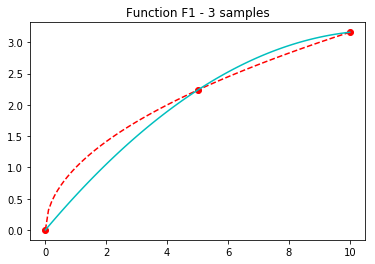

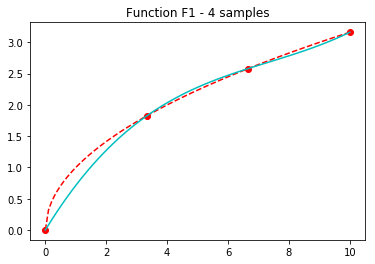

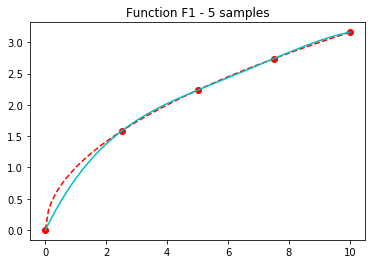

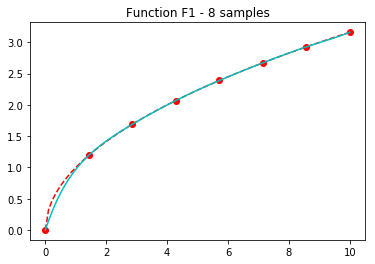

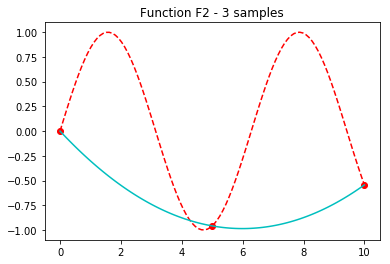

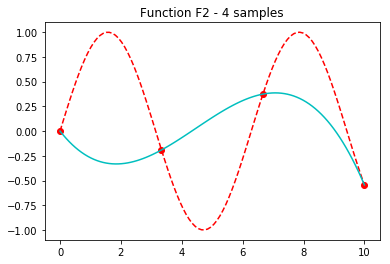

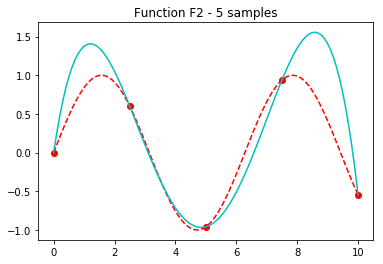

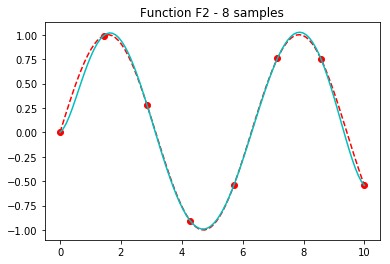

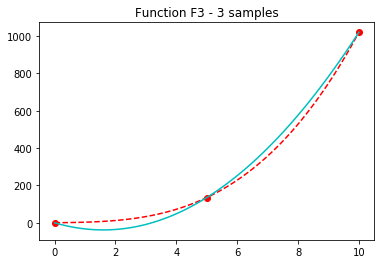

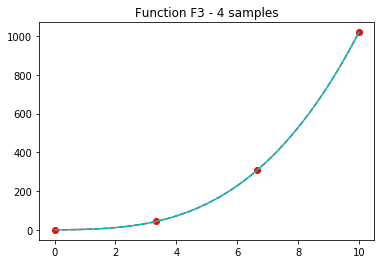

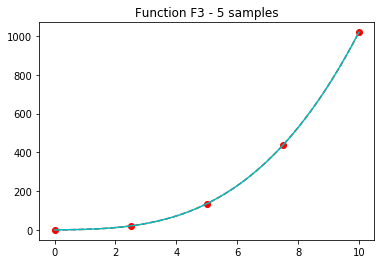

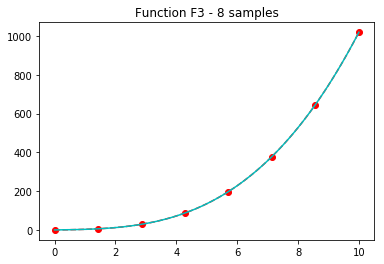

In [7]:
x = np.linspace(DOMAIN[0], DOMAIN[1], 100)

for f in FUNCTIONS:
    for s in SAMPLES:
        plt.figure()
        plt.title(f'Function {f.__name__} - {s} samples')
        # tabularized points
        plt.plot(*zip(*tables[f.__name__][s]), 'ro')
        # input function
        plt.plot(x, list(map(f, x)), 'r--')
        # interpolated function
        plt.plot(x, list(map(lagrange(tables[f.__name__][s]), x)), 'c')

## Errors
---

In [8]:
for f in FUNCTIONS:
    for s in SAMPLES:
        print(f'\n> Function {f.__name__} - {s} samples')
        L = lagrange(tables[f.__name__][s])
        for x in np.linspace(DOMAIN[0], DOMAIN[1], 2*s-1):
            print("\t x = %10f \t error = %+10f \t relative = %5.2f%%" % (x, (L(x)-f(x)), abs(L(x)-f(x))/f(x)*100 if f(x) != 0 else 0))


> Function F1 - 3 samples
	 x =   0.000000 	 error =  +0.000000 	 relative =  0.00%
	 x =   2.500000 	 error =  -0.299373 	 relative = 18.93%
	 x =   5.000000 	 error =  +0.000000 	 relative =  0.00%
	 x =   7.500000 	 error =  +0.124292 	 relative =  4.54%
	 x =  10.000000 	 error =  +0.000000 	 relative =  0.00%

> Function F1 - 4 samples
	 x =   0.000000 	 error =  +0.000000 	 relative =  0.00%
	 x =   1.666667 	 error =  -0.188591 	 relative = 14.61%
	 x =   3.333333 	 error =  +0.000000 	 relative =  0.00%
	 x =   5.000000 	 error =  +0.045638 	 relative =  2.04%
	 x =   6.666667 	 error =  +0.000000 	 relative =  0.00%
	 x =   8.333333 	 error =  -0.048469 	 relative =  1.68%
	 x =  10.000000 	 error =  +0.000000 	 relative =  0.00%

> Function F1 - 5 samples
	 x =   0.000000 	 error =  +0.000000 	 relative =  0.00%
	 x =   1.250000 	 error =  -0.135968 	 relative = 12.16%
	 x =   2.500000 	 error =  +0.000000 	 relative =  0.00%
	 x =   3.750000 	 error =  +0.023110 	 relative 